<a href="https://colab.research.google.com/github/rexian/ML/blob/main/text2image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install diffusers transformers accelerate

Text to Image generation using Stable Diffusion and Diffusers

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

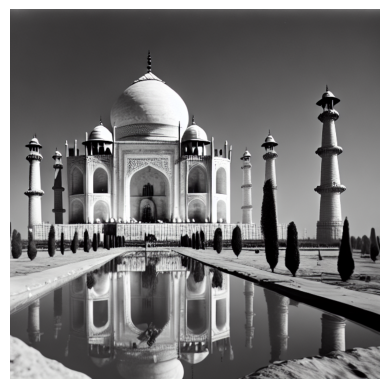

  0%|          | 0/50 [00:00<?, ?it/s]

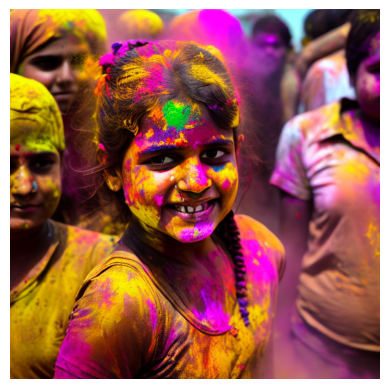

In [19]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-2-1"
model_id = model_id2

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

#prompt = "a photograph of an astronaut riding a horse"
prompt = "a photograph of Tajmahal on Moon"
image = pipe(prompt).images[0]
plt.imshow(image)
plt.axis("off")
plt.show()

#image.save("astronaut_rides_horse.png")

prompt = "a photograph of a girl playing holi"
image = pipe(prompt).images[0]
plt.imshow(image)
plt.axis("off")
plt.show()


Working with Diffusion parameters

* negative prompting
* num_inference_steps
* num_images_per_prompt
* width
* height

In [20]:
def generate_image(pipe, prompt, params):
    img = pipe(prompt, **params).images

    if len(img) > 1:
      fig, ax = plt.subplots(nrows=1, ncols=len(img))
      for i in range(len(img)):
        ax[i].imshow(img[i])
        ax[i].axis("off")
        plt.show()
    else:
        fig = plt.figure()
        plt.imshow(img[0])
        plt.axis("off")
        plt.show()
    plt.tight_layout()
    plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

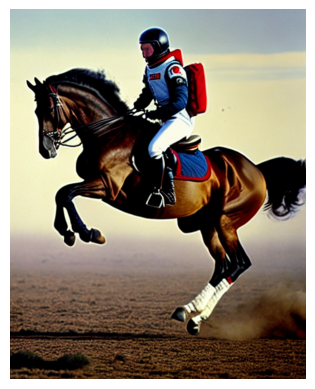

<Figure size 640x480 with 0 Axes>

In [26]:
prompt = "a photograph of an astronaut riding a horse"
params = {'num_inference_steps': 100, 'width': 512, 'height': int(640), 'negative_prompt': 'distorted, ugly'}
generate_image(pipe, prompt, params)
#

  0%|          | 0/100 [00:00<?, ?it/s]

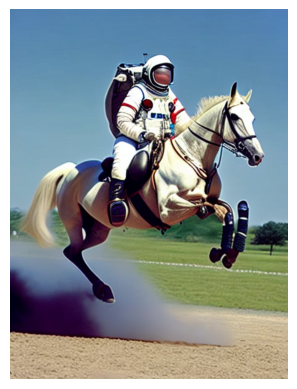

<Figure size 640x480 with 0 Axes>

In [30]:
prompt = "a photograph of an astronaut riding a horse"
params = {'num_inference_steps': 100, 'width': 480, 'height': 640, 'negative_prompt': 'distorted, dark'}
generate_image(pipe, prompt, params)